## 练习：分类花朵图像
使用本节课所学内容建立一个带有防止过拟合方法的CNN模型
### 样例
尺寸不同的RGB三通道彩色图片，总共五种类型的花的图片
### 标签
* 0: daisy
* 1: dandelion
* 2: roses
* 3: sunflowers
* 4: tulips

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

In [2]:
#import packages
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 导入数据
### 下载数据
首先将花朵数据下载到本地，并解压到同文件夹中data路径下。[数据下载链接](https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz)。解压后的文件目录结构为：
<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>flower_photos</b>
|__ <b>diasy</b>
|__ <b>dandelion</b>
|__ <b>roses</b>
|__ <b>sunflowers</b>
|__ <b>tulips</b>
</pre>

之后需要对文件夹中的图片数据进行划分，分成训练集和验证集，其中80%为训练集。使用下面代码对数据进行自动处理，处理后的文件目录结构为：
<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>flower_photos</b>
|__ <b>diasy</b>
|__ <b>dandelion</b>
|__ <b>roses</b>
|__ <b>sunflowers</b>
|__ <b>tulips</b>
|__ <b>train</b>
    |______ <b>daisy</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>dandelion</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>roses</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>sunflowers</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>tulips</b>: [1.jpg, 2.jpg, 3.jpg ....]
 |__ <b>val</b>
    |______ <b>daisy</b>: [507.jpg, 508.jpg, 509.jpg ....]
    |______ <b>dandelion</b>: [719.jpg, 720.jpg, 721.jpg ....]
    |______ <b>roses</b>: [514.jpg, 515.jpg, 516.jpg ....]
    |______ <b>sunflowers</b>: [560.jpg, 561.jpg, 562.jpg .....]
    |______ <b>tulips</b>: [640.jpg, 641.jpg, 642.jpg ....]   
</pre>

In [3]:
base_dir = os.path.join('data', 'flower_photos')

classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

for cl in classes:
    # 对于每一类的图片文件夹
    img_path = os.path.join(base_dir, cl)
    # 使用glob.glob()方法获取当前文件夹下匹配参数字符串的所有文件名
    images = glob.glob(img_path + '/*.jpg')
    print("{}: {} Images".format(cl, len(images)))
    train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]
    
    # 建立对应的训练集和验证集文件目录
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
        os.makedirs(os.path.join(base_dir, 'train', cl))
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
        os.makedirs(os.path.join(base_dir, 'val', cl))
        
    # 使用shutil.move()方法移动文件
    for t in train:
        shutil.move(t, os.path.join(base_dir, 'train', cl))

    for v in val:
        shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [4]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

### 设置BATCH_SIZE以及IMG_SHAPE
* **BATCH_SIZE**：一个Batch中图片的数量
* **IMG_SHAPE**：首先需要将尺寸不同的图片处理成尺寸相同的图片，这里的``IMG_SHAPE``即处理后的图片高和宽的像素数

In [7]:
BATCH_SIZE = 128
IMG_SHAPE = 150

## 数据增强操作

In [6]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

Found 2935 images belonging to 5 classes.


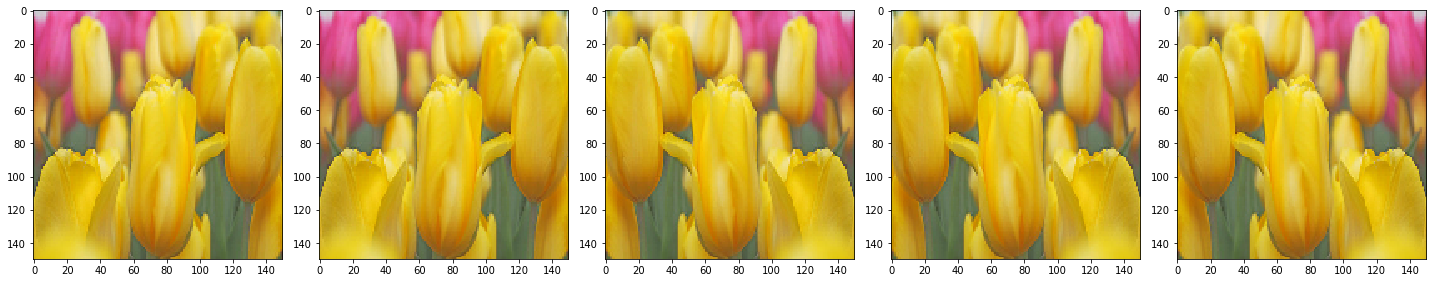

In [8]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_SHAPE, IMG_SHAPE))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2935 images belonging to 5 classes.


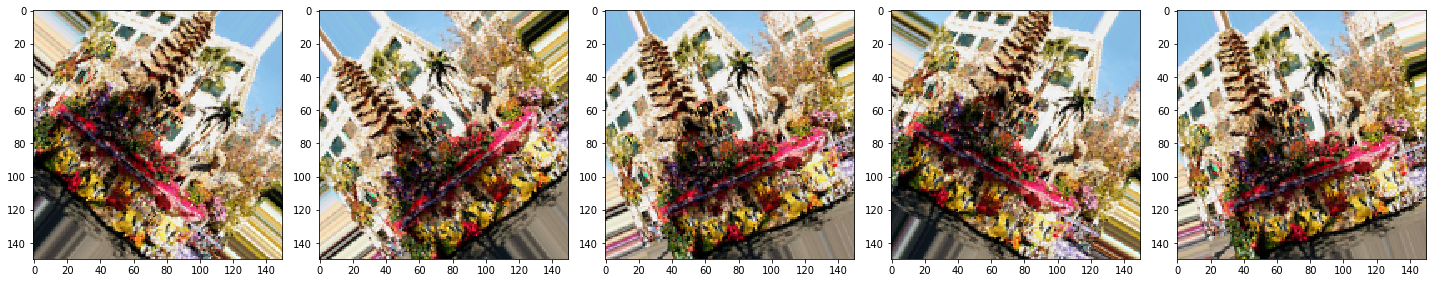

In [10]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_SHAPE, IMG_SHAPE))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2935 images belonging to 5 classes.


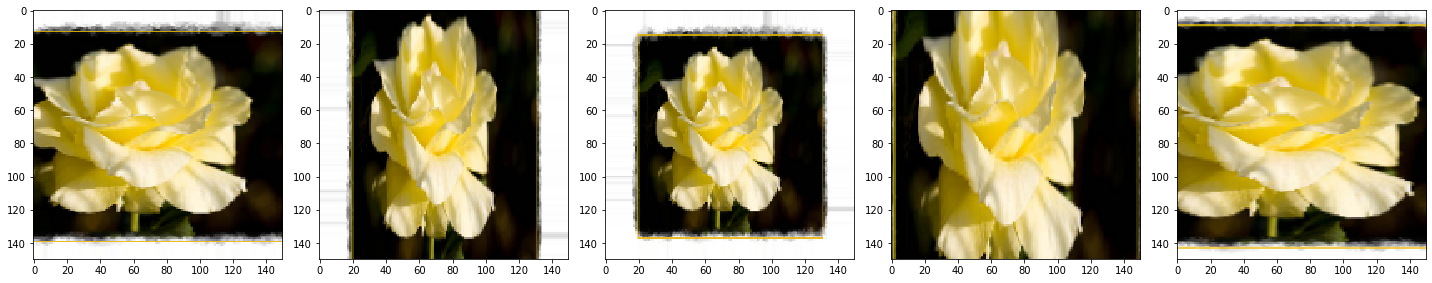

In [11]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_SHAPE, IMG_SHAPE))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2935 images belonging to 5 classes.


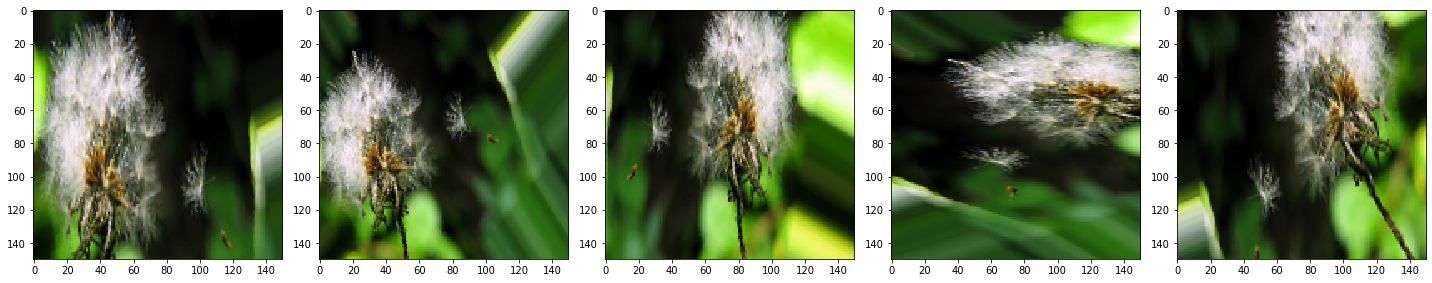

In [12]:
image_gen = ImageDataGenerator(rescale=1./255,
                              rotation_range=45,
                              zoom_range=.5,
                              horizontal_flip=True,
                              width_shift_range=.15,
                              height_shift_range=.15)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_SHAPE, IMG_SHAPE),
                                              class_mode='sparse')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [13]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                directory=val_dir,
                                                shuffle=False,
                                                target_size=(IMG_SHAPE, IMG_SHAPE),
                                                class_mode='sparse')

Found 735 images belonging to 5 classes.


## 构建模型

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(units=512, activation='relu'),
    
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(units=5, activation='softmax')
])

## 编译模型

In [18]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

## 训练模型

In [19]:
EPOCHS = 100
history = model.fit_generator(train_data_gen,
                             epochs=EPOCHS,
                             steps_per_epoch=np.ceil(train_data_gen.n / float(BATCH_SIZE)),
                             validation_data=val_data_gen,
                             validation_steps=np.ceil(val_data_gen.n / float(BATCH_SIZE)))

Epoch 1/100


W0725 17:55:43.654321 13040 deprecation.py:323] From C:\Users\arsener\PycharmProjects\tensorflow2.0beta\venv\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


23/23 [==============================] - 93s 4s/step - loss: 1.5620 - accuracy: 0.3302 - val_loss: 1.2647 - val_accuracy: 0.4531
Epoch 2/100
23/23 [==============================] - 78s 3s/step - loss: 1.2522 - accuracy: 0.4463 - val_loss: 1.1295 - val_accuracy: 0.5619
Epoch 3/100
23/23 [==============================] - 77s 3s/step - loss: 1.1269 - accuracy: 0.5438 - val_loss: 1.0133 - val_accuracy: 0.6150
Epoch 4/100
23/23 [==============================] - 77s 3s/step - loss: 1.0707 - accuracy: 0.5714 - val_loss: 0.9862 - val_accuracy: 0.6177
Epoch 5/100
23/23 [==============================] - 76s 3s/step - loss: 1.0073 - accuracy: 0.6017 - val_loss: 0.9200 - val_accuracy: 0.6517
Epoch 6/100
23/23 [==============================] - 77s 3s/step - loss: 0.9664 - accuracy: 0.6221 - val_loss: 0.8386 - val_accuracy: 0.6871
Epoch 7/100
23/23 [==============================] - 76s 3s/step - loss: 0.9288 - accuracy: 0.6378 - val_loss: 0.8771 - val_accuracy: 0.6694
Epoch 8/100
23/23 [======

Epoch 59/100
23/23 [==============================] - 77s 3s/step - loss: 0.4749 - accuracy: 0.8208 - val_loss: 0.6411 - val_accuracy: 0.7687
Epoch 60/100
23/23 [==============================] - 76s 3s/step - loss: 0.5002 - accuracy: 0.8143 - val_loss: 0.5908 - val_accuracy: 0.7864
Epoch 61/100
23/23 [==============================] - 75s 3s/step - loss: 0.4680 - accuracy: 0.8194 - val_loss: 0.6087 - val_accuracy: 0.7932
Epoch 62/100
23/23 [==============================] - 76s 3s/step - loss: 0.4686 - accuracy: 0.8225 - val_loss: 0.5736 - val_accuracy: 0.8000
Epoch 63/100
23/23 [==============================] - 75s 3s/step - loss: 0.4478 - accuracy: 0.8324 - val_loss: 0.5511 - val_accuracy: 0.8054
Epoch 64/100
23/23 [==============================] - 76s 3s/step - loss: 0.4371 - accuracy: 0.8320 - val_loss: 0.6047 - val_accuracy: 0.7918
Epoch 65/100
23/23 [==============================] - 75s 3s/step - loss: 0.4306 - accuracy: 0.8371 - val_loss: 0.5668 - val_accuracy: 0.8054
Epoch 

## 可视化训练结果
将模型在训练集以及测试集上分别得到的不同``epoch``对应的``loss``以及准确率进行可视化。

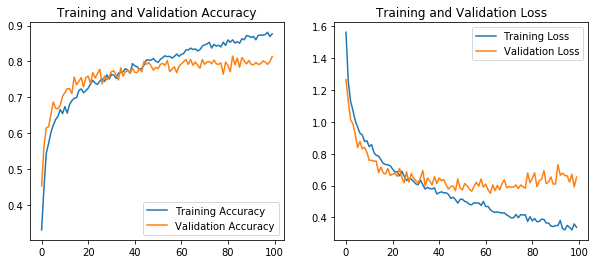

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()